In [1]:
import altair as alt
alt.renderers.enable('notebook')

Sample data:

In [2]:
import vega_datasets
seattle_temps = vega_datasets.data.seattle_temps()

seattle_temp_extrema = (seattle_temps
                        .set_index('date')
                        .resample('W')
                        .apply(['min', 'max', 'mean'])
                        .temp
                        .reset_index()
                        .melt(id_vars='date', var_name='var', value_name='temp')
                       )
seattle_temp_extrema.head()

,date,var,temp
0,2010-01-03,min,38.6
1,2010-01-10,min,39.2
2,2010-01-17,min,39.5
3,2010-01-24,min,39.6
4,2010-01-31,min,39.2


To visualize dataframes like this, Altair is very concise:

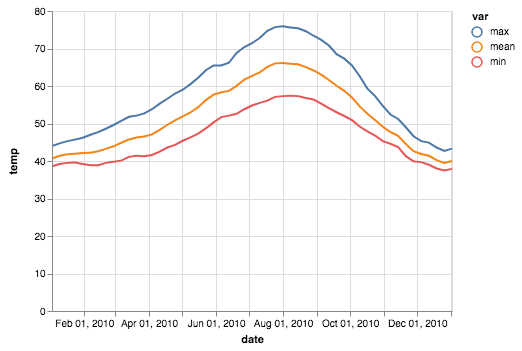

In [3]:
alt.Chart(seattle_temp_extrema).mark_line().encode(x='date', y='temp', color='var')

When working in the notebook, I find myself frequently copy-pasting this cell around, modifying the encoding, mark type, and the name of the dataframe.

`autovega` is a helper tool that speeds up simple plotting workflows like this using Jupyter widgets.

In [4]:
import autovega

Wrap the `display_dataframe` function around a dataframe to render a GUI for choosing one of several plot types and encodings:

In [5]:
autovega.display_dataframe(seattle_temp_extrema)

AutoVega(children=(ToggleButtons(options=('Table', 'Scatter', 'Line', 'Bar'), value='Table'), Output()))

To make this the default behavior, call `register_renderer`. Then autovega wil be the default display formatter for all Pandas dataframes.

In [6]:
autovega.register_renderer()

In [7]:
seattle_temp_extrema

AutoVega(children=(ToggleButtons(options=('Table', 'Scatter', 'Line', 'Bar'), value='Table'), Output()))